<a href="https://colab.research.google.com/github/hamidrezanorouzi/numericalMethods/blob/main/Lectures/curveFitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Notes**❕
This content forms a part of the instructional presentations for the **`numerical methods in chemical engineering`** course designed for undergraduate chemical engineering students at Amirkabir University of Technology.

Feel free to utilize the information and source codes provided in this material, ensuring appropriate acknowledgment of the original document.

The visual elements featured in this document have been sourced from the following sources, unless specified otherwise:

* Steven C. Chapra, Applied Numerical Methods with Matlab for Engineers and Scientists, 3rd edition, McGraw-Hill (2012).


<div align="center">
🟪 🟪 🟪
</dive>

---

# 🔵 1) What are the applications?


* **Kinetics and Reaction Rate Modeling:** Curve fitting is used to determine **reaction kinetics** and **rate constants** by fitting experimental data to various kinetic models.

* **Material Properties Estimation:** Curve fitting can be employed to determine material properties, such as **thermo-physical properties**, from experimental data. This is vital for designing and simulating chemical processes accurately.

* **Calibration of Instruments:** In chemical engineering, instruments like **spectrophotometers**, **mass spectrometers**, and **chromatographs** require calibration. Curve fitting is used to relate instrument responses to known concentrations or properties of chemical compounds.

* **Experimental Data Analysis:** Curve fitting aids in extracting meaningful information from noisy or complex experimental data, helping researchers and engineers draw conclusions and make decisions based on the data.
* And many more...

<div align="center">
🟦 🟦 🟦
</div>


---



# 🔴 2) What is a curve fitting problem?

* Consider that we have $n$ set of data points (most often obtained from experimental measurements), $(x_i, y_i)$ with $i = 1, 2,..., n$

* The task of curve fitting/regression is to find an smooth curve  $f(x)$ that goes trough the data points, which on average have the least error in representing the data.

* The curve $f(x)$ has $m$ coefficients in its mathmatical relation that should be determined in the process of curve-fitting:

 $$
 f(x) = f(x, a_1, a_2, a_3, ..., a_m)
 $$

 where, ***m<n*** and  $f$ is a function of $x$ and constants $a_i$ is to be determined.



* The form of $f(x)$ is pre-determined.
 * We usually use linear form $y = a_0 + a_1x$
 * Higher order polynomials can also be used: $y = a_0 + a_1x + a_2x^2 + a_3x^3$
 * Other forms of functions can be converted into the linear  form:
   * Consider $z = b_0 e^{b_1x}$, which is non-linear.
   * if we take logarithm from the both sides
   $Ln (z) = ln(b_0) + b_1x$, which is equivalent to finding the best **linear** fit on data points $(x_i, ln(z_i))$.


## 2-1) The definition of least squares
* The process of curve-fitting is to find the coefficients in function $f(x)$ that **best fits/represents** the experimental data.
* The definition of the **Best Fit** can be any statistical measure.
 * Minimizing sum of residual errors:
 $$
 \sum_{i=1}^{n}e_i = \sum_{i=1}^{n}(y_i-f(x_i))
 $$
 * Minimizing sum of absolute of residual errors:
 $$
 \sum_{i=1}^{n}|e_i| = \sum_{i=1}^{n}|y_i-f(x_i)|
 $$
 * Minimizing sum of the **square of residual errors** (called sum of residuals):
 $$
 S_r = \sum_{i=1}^{n}(e_i)^2 = \sum_{i=1}^{n}(y_i-f(x_i))^2
 $$
* Among the above options, the best one is the last one.
* So, **least squres** is to find the coefficients in function $f(x)$ that minimizes the sum of the square of residual errors.

<div align="center">
🟥 🟥 🟥
</div>


---



# 🟢 3) Least squres for a straight line


## 3-1) Problem definition
* The function is $f(x) = a_0 + a_1x$.
* The task is to find $a_0$ and $a_1$ so that the sum of square of residual errors becomes minimum (best fit).
* Sum of residuals becomes:
$$
S_r = \sum_{i=1}^{n}(y_i-f(x_i))^2 = \sum_{i=1}^{n}(y_i-a_0-a_1x_i)^2 \tag{3-1}
$$




## 3-2) Formulation
* To find the the values of $a_0$ and $a_1$, we should take the derivatives of Eq. (3-1) with respect to $a_0$ and $a_1$:
$$
\begin{aligned}
\frac{∂S_r}{∂a_0} &= -2\sum_{i=1}^{n}(y_i-a_0-a_1x_i)   \\
\frac{∂S_r}{∂a_1} &= -2\sum_{i=1}^{n}((y_i-a_0-a_1x_i)x_i)
\end{aligned} \tag{3-2}
$$

* Setting these derivatives equal to zero will result in a minimum $S_r$:

$$
\begin{aligned}
0 &= \sum y_i - \sum a_0 - \sum a_1x_i \\
0 &= \sum x_iy_i - \sum x_ia_0 - \sum a_1x^2_i   
\end{aligned}
\tag{3-3}
$$

* rearranging the equations will give:
$$
\begin{aligned}
\begin{cases}
n a_0 &+ (\sum x_i)a_1 &= \sum y_i  \\
(\sum x_i)a_0 &+ (\sum x^2_i)a_1 &= \sum x_iy_i  
\end{cases}
\end{aligned}
\tag{3-4}
$$

## 3-3) Code for straight line least squares

In [1]:
import numpy as np

def starightLineCurveFitting(x,y):
  n = len(x)
  ny = len(y)

  if n!=ny:
    print("number of x data points and y data points does not match!")
    return None

  A = np.zeros((2,2))
  B = np.zeros((2,1))
  A[0,0] = n;
  A[1,0] = A[0,1] = np.sum(x)
  A[1,1] = np.sum(x*x)
  B[0] = np.sum(y)
  B[1] = np.sum(x*y)
  a = np.linalg.solve(A, B)

  return a.reshape((2,))



### ❓ **Example 1**
Fit a straight line on the measured data given in table below:

| V (m/s) | F (N)|
| :---: | :---: |
|10| 25|
|20| 70|
|30| 380|
|40| 550|
|50| 610|
|60| 1220|
|70| 830|
|80| 1450|

💡 *Solution*

Using Eq. (3-4), we should compute the coefficient maxtrix and know vector to form the equations set.

|i| $x_i$  | $y_i$| $x^2_i$ | $x_iy_i$|
|:---| :---: | :---: | :---: |:---:|
|1|10| 25|  100 | 250 |
|2|20| 70|  400 | 1400|
|3|30| 380| 900 | 11400|
|4|40| 550| 1600| 22000|
|5|50| 610| 2500| 30500|
|6|60| 1220| 3600| 73200 |
|7|70| 830| 4900 | 58100|
|8|80| 1450| 6400| 116000|
|$\sum$| **360** |**5135** | **20400** | **312850**|

The following set of equations is obtained

$$
\begin{bmatrix}
8 & 360 \\
360 & 20400
\end{bmatrix}
\begin{bmatrix} a_0 \\ a_1 \end{bmatrix} =
\begin{bmatrix} 5135 \\ 312850 \end{bmatrix}
$$

We can solve it using Cramer's rule:


\begin{aligned}
D &= 8(20400)-360^2 = 33600 \\
a_0 &= \frac{D_0}{D} = \frac{\begin{vmatrix} 5135 & 360 \\ 312850 & 20400 \end{vmatrix} }{33600} = -243.2857 \\
a_1 &= 19.47024 \\
F &= -243.2857 + 19.47024 V
\end{aligned}


 a0 = -234.28571428571402 and a1 = 19.47023809523809


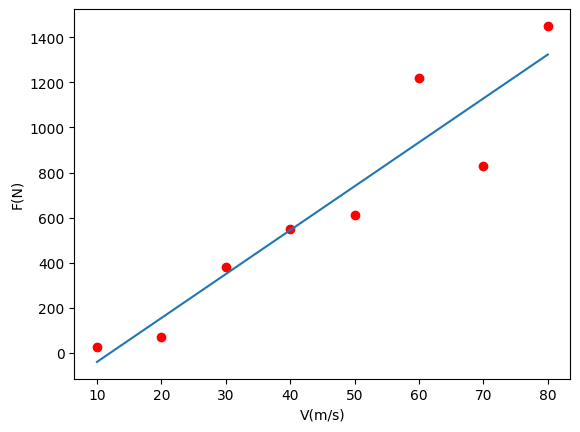

In [2]:
import matplotlib.pyplot as plt

V = np.array([10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0])
F = np.array([25.0,70.0, 380.0, 550, 610, 1220, 830, 1450])
a0, a1 = starightLineCurveFitting(V,F)

print(f' a0 = {a0} and a1 = {a1}')

fittedF = [a0 + a1*vi for vi in V]
plt.scatter(V,F, c='r')
plt.plot(V, fittedF)
plt.xlabel('V(m/s)')
plt.ylabel('F(N)')
plt.show()

## 3-4) Linearization of functions

<div align="center">
🟩 🟩 🟩
</div>


---



# 🟡 4) Quantification of Error

* After regression, we should evaluate how well the curve $f(x)$ represents the original data.


## 4-1) Sum of residuals
* shows the distance between data and predicted values. In other wrods, **it quantifies the distribution of data points around curve $f(x)$**
 $$
 S_r = \sum_{i=1}^{n}(e_i)^2 = \sum_{i=1}^{n}(y_i-f(x_i))^2 \tag{4-1}
 $$

<div align="center">
<img src="https://drive.google.com/uc?id=1lryprZXsNxo_Q23Y3hcXnUOOXiBK1QGc" width="400">
</div>

## 4-2) Sum of total error
*  Sum of total error shows the vertical distance between data points and their mean value. In other words, **it quntifies the distribution of the data pionts around their mean**.

$$
 \begin{aligned}
 S_t &= \sum_{i=1}^{n}(y_i-\bar{y})^2 \\
 \bar{y} &= \frac{\sum y_i}{n}
 \end{aligned} \tag{4-2}
 $$

 <div align="center">
 <img src="https://drive.google.com/uc?id=1eS2bSJY9RxicAkh15q60Ps46XMjYNrLN" width="400">
 </div>


## 4-3) Standard error of estimate
* It quantifies the spread of data points around the regressed curve $f(x)$.
$$
S_{x/y} = \sqrt{\frac{S_r}{n-m}}  \tag{4-3}
$$

 * $n$: is the number of data points.
 * $m$: is the number of coeffcients, $a_i$s, obtained from regression. For straight line it is 2.
 * $x/y$: shows that the error is for a predicted value of y corresponding to a particular value of x.


## 4-4) Coefficient of determination ($R^2$)


# ⚫ 5) Least squares for a polynomial
* The least squares method we used for a straight line can be extended for fitting the data on a polynomial of order $m$.

* Recatll the regrssion for straigh line $y=a_0+a_1x$. We obtained the following matrix:
$$
\begin{aligned}
\begin{cases}
n a_0 &+ (\sum x_i)a_1 &= \sum y_i  \\
(\sum x_i)a_0 &+ (\sum x^2_i)a_1 &= \sum x_iy_i  
\end{cases}
\end{aligned}
$$

&nbsp;


* With the same procedure we can obtain the following set of equations for regression of polynomial $y=a_0+a_1x+...+a_{m}x^m$.

$$
\begin{aligned}
\begin{cases}
n &a_0 + (\sum x_i)&a_1 + . . . &+ (\sum x^m_i)&a_m = \sum y_i  \\
(\sum x_i)&a_0 + (\sum x^2_i)&a_1 +...&+(\sum x^{m+1}_i)&a_m = \sum x_iy_i \\
. & & & &. \\
. & & & &. \\
. & & & &. \\
(\sum x^m_i)&a_0 +(\sum x^{m+1}_i)&a_1 +...&+(\sum x^{2m}_i)&a_m = \sum x^m_iy_i
\end{cases}
\end{aligned}
\tag{5-1}
$$

&nbsp;



* The above set can be converted into matrix form, the size of coefficient matrix is $(m+1)×(m+1)$:
$$ \begin{bmatrix}
n &  \sum x_i & ... & \sum x^m_i\\
\sum x_i & \sum x^2_i & ...& \sum x^{m+1}_i\\
. \\
. \\
\sum x^m_i & \sum x^{m+1}_i& ... & \sum x^{2m}_i
\end{bmatrix}
\begin{bmatrix} a_0 \\ a_1\\ . \\ . \\ a_m\end{bmatrix} =
\begin{bmatrix} \sum y_i \\ \sum x_iy_i\\ . \\ . \\ \sum x^m_iy_i \end{bmatrix}
\tag{5-2}
$$

### ❓ **Example 3:**
We have experimental data on the constant pressure heat capacity ($C_P$) on n-butane from 100 to 1400 K. We are supposed to fit a polynomial of order 2 on these data and calculate the coefficient of determination and average absolue relative error for the fit.

**Note**: The data are obtained from [NIST databank](https://webbook.nist.gov/cgi/cbook.cgi?ID=C106978&Units=SI&Mask=1F).

| Temperature (K) | $C_P (\frac{J}{molK})$ |
| :---: | :---: |
| 100.00 | 55.350 |
| 200.00 | 76.440 |
| 273.15 | 92.300 |
| 298.15 | 98.490 |
| 300.00 | 98.950 |
| 400.00 | 124.770 |
| 600.00 | 169.280 |
| 800.00 | 202.380 |
| 900.00 | 215.730 |
| 1100.00 | 237.480 |
| 1200.00 | 246.270 |
| 1400.00 | 260.580 |


💡 *Solution*

We can use Eq. (5-2) to construct the required set of equations for curve fitting. Since $m=2$, we will end with a 3×3 system.

Here is the table that calculates the required coefficients. Remember that we do our calculations with 6 decimal points precision.

|i| $x_i$ | $y_i$ | $x^2_i$ | $x^3_i$ | $x^4_i$| $x_iy_i$ | $x^2_iy_i$|
|:---| --- | ---- | ---| --- | ---|---| ---|
|1|1.00000E+02 | 5.535000E+01 | 1.000000E+04 | 1.000000E+06 | 1.000000E+08|5.535000E+03 | 5.535000E+05 |
|2|2.00000E+02 | 7.644000E+01 | 4.000000E+04 | 8.000000E+06 | 1.600000E+09|1.528800E+04 | 3.057600E+06 |
|3|2.73150E+02 | 9.230000E+01 | 7.461092E+04 | 2.037997E+07 | 5.566790E+09|2.521175E+04 | 6.886588E+06 |
|4|2.98150E+02 | 9.849000E+01 | 8.889342E+04 | 2.650357E+07 | 7.902041E+09|2.936479E+04 | 8.755113E+06 |
|5|3.00000E+02 | 9.895000E+01 | 9.000000E+04 | 2.700000E+07 | 8.100000E+09|2.968500E+04 | 8.905500E+06 |
|6|4.00000E+02 | 1.247700E+02 | 1.600000E+05 | 6.400000E+07 | 2.560000E+10|4.990800E+04 | 1.996320E+07 |
|7|6.00000E+02 | 1.692800E+02 | 3.600000E+05 | 2.160000E+08 | 1.296000E+11|1.015680E+05 | 6.094080E+07 |
|8|8.00000E+02 | 2.023800E+02 | 6.400000E+05 | 5.120000E+08 | 4.096000E+11|1.619040E+05 | 1.295232E+08 |
|9|1.00000E+03 | 2.273600E+02 | 1.000000E+06 | 1.000000E+09 | 1.000000E+12|2.273600E+05 | 2.273600E+08 |
|10|1.20000E+03 | 2.462700E+02 | 1.440000E+06 | 1.728000E+09 | 2.073600E+12|2.955240E+05 | 3.546288E+08 |
|11|1.40000E+03 | 2.605800E+02 | 1.960000E+06 | 2.744000E+09 | 3.841600E+12|3.648120E+05 | 5.107368E+08 |
|$\sum$|**6.57130E+03** | **1.652170E+03** | **5.863504E+06** | **6.346884E+09** | **7.503269E+12**|**1.306161E+06** | **1.331311E+09** |



The following set of equaitons is formed.
$$ \begin{bmatrix}
11 &  6.57130E+03 & 5.863504E+06 \\
6.57130E+03 & 5.863504E+06 & 6.346884E+09\\
 5.863504E+06 & 6.346884E+09 & 7.503269E+12
\end{bmatrix}
\begin{bmatrix} a_0 \\ a_1\\ a_2\end{bmatrix} =
\begin{bmatrix} 1.652170E+03 \\ 1.306161E+06\\ 1.331311E+09 \end{bmatrix}
$$

The solution of the above set using Gauss elimination (or any other method) is:
$$
\begin{aligned}
a_0 &= 2.177855\times10^1 \\  
a_1 &= 2.929206\times10^{-1} \\
a_2 &= -8.736465\times10^{-5}
\end{aligned}
$$

## 5-1) Code for polynomial fit

In [3]:
import numpy as np

def polyfit(x, y, m, printMat: bool= False):

  n = len(x)
  ny = len(y)

  if n != ny:
    print("number of data points in vectors x and y is not equal")
    return None

  A = np.zeros((m+1,m+1))
  B = np.zeros((m+1,1))

  for i in range(m+1):
    for j in range(m+1):
      A[i,j]= np.sum(pow(x,i+j))

    B[i] = np.sum( y * pow(x,i))


  coeffs = np.linalg.solve(A,B)
  a = coeffs.reshape((m+1),)

  # constructing fitted function
  def fittedFx(x):
    yi = [pow(x,i) for i in range(m+1)]
    return np.dot(a,yi)

  # error calculation
  e = np.zeros((n,))
  er = np.zeros((n,))
  for i in range(n):
    e[i] = y[i] - fittedFx(x[i])
    er[i] = e[i]/max(abs(y[i]),1.0e-15)

  y_mean = np.mean(y)
  Sr = np.sum(np.square(e) )
  St = np.sum( np.square(y - y_mean) )

  R2 = 1- Sr/St;
  averageRelError = np.mean(er)

  if printMat:
    print("Marix A \n",A)
    print("Vector B \n", B)

  return a, R2, averageRelError


R2 = 0.99874
Average absolute relative error = 0.00188


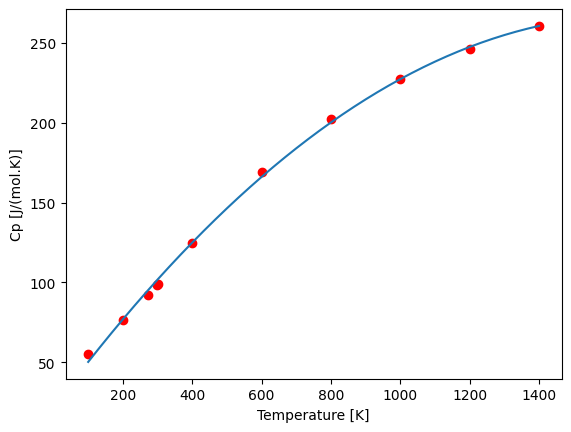

In [4]:
import numpy as np
import matplotlib.pyplot as plt

T = np.array([100, 200, 273.15, 298.15,
              300, 400, 600,
              800, 1000, 1200, 1400])

Cp = np.array([55.35, 76.44, 92.3, 98.49,
               98.95, 124.77, 169.28,
               202.38, 227.36, 246.27, 260.58])

[a0, a1, a2], R2, err = polyfit(T,Cp, 2)

print(f'R2 = {R2:.5f}')
print(f'Average absolute relative error = {err:.5f}')

fx = lambda x: a0+a1*x+a2*x*x
TT = np.linspace(100,1400, 40)
CpPredicted = [fx(Ti) for Ti in TT]

plt.scatter(T,Cp, c='r')
plt.plot(TT,CpPredicted)
plt.xlabel("Temperature [K]")
plt.ylabel("Cp [J/(mol.K)]")
plt.show()


<div align="center">
⬛ ⬛ ⬛
</div>


---



# 🟤 6) General linear least squares

* Consider that you have a data set and you want to fit a function over that data set. The function has the following form:
$$
y = a_0z_0 + a_1z_1 + a_2z_2 + ... + a_mz_m = \sum_{j=0}^{m} a_jz_j \tag{6-1}
$$

* If each of these $z_i$ is a function of independent vairbales of the data set, we can use linear regression technique to perform the fit.
* This is the most general form of the linear least squares that includes polynomial and straight line least squares.

 * For example, In polynomial fit, $z_0 = 1$, $z_1 = x$, $z_2 = x^2$, ..., $z_m = x^m$.
 * Or, in straight line fit, $z_0 = 1$, $z_1 = x$.
 * It also include multi-variate least squares.





## 6-1) Formulation
* Consider that we have a data set containing $n$ samples and we want to fit the data on a curve given by Eq. (6-1).
* We can create a $n\times m$ matrix of **independent variables** like this:
$$
[Z] =
\begin{bmatrix}
z_{0,1} & z_{1,1} & ... & a_{m,1} \\
z_{0,2} & z_{1,2} & ... & a_{m,2} \\
. \\ . \\ . \\
z_{0,n} & z_{1,n} & ... & a_{m,n}
\end{bmatrix}_{n\times m} \notag
\tag{6-2}
$$
 * $m$ is the number of variables in the model
 * $n$ is the number data points, and $n>m$ always holds.

* The matrix of denpendent variables is:
$$
[y]^T = [y_1,y_2,...,y_n]_{1 \times n} \tag{6-3}
$$
* The matrix of unkonwns is:
$$
[a]^T = [a_1,a_2,...,a_m]_{1 \times m} \tag{6-3}
$$


* The residual error is defined as:
$$
S_r = \sum_{i=i}^n (y_i-\sum_{j=0}^m a_jz_{ji})^2 \tag{6-4}
$$
* The derivative of $S_r$ should be taken with respect to each of $a_j$ and setting the resulting equation to zero.
* Without going into detials, it can be shown that we will end up the following equation, which forms a set of linear equations with m unknown:
$$
[[Z]^T[Z]][a] = [Z]^T[y] \\ \tag{6-5}
$$

* The solution of the above set will give model coefficients $a_i$s.

### ❓ **Example 4 (using python):**
Conside we have a set of experimental data points on vapor pressure of ethanol and we want to fit the data over Reidel equation as follows:
$$
ln{P^*} = A - \frac{B}{T} + C ln(T) + DT^2
$$
Obtain a set of model coefficients, {A, B, C, D} that best fit the data.

|i| Temperature [K] | $P^*$ [kPa]|
|---|:---:|:---:|
|1	|273.15	|1.5932|
|2	|281.45	|2.76|
|3	|284.75	|3.413|
|4	|289.05	|4.493|
|5	|294.25	|6.199|
|6	|303.16	|10.454|
|7	|308.18	|13.785|
|8	|313.15	|17.877|
|9	|319.17	|24.257|
|10	|325.55	|33.411|
|11	|333.15	|46.839|
|12	|338.15	|58.358|
|13	|343.15	|72.273|
|14	|350.85	|100.045|
|15	|351.7	|102.22|

**Note:** The data are obtained from [Dortmond databank](http://www.ddbst.com/en/EED/PCP/VAP_C11.php).

A = [-111.98086648], B = [1181.25118864], C = [21.41177992], D = [-4.49828163e-05]


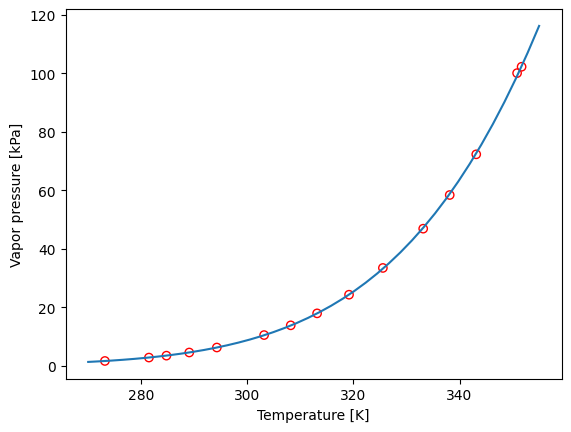

In [5]:
import numpy as np
import matplotlib.pyplot as plt

## Data
T = np.array(
    [273.15, 281.45, 284.75, 289.05,
     294.25, 303.16, 308.18, 313.15,
     319.17, 325.55, 333.15, 338.15,
     343.15, 350.85, 351.7])
Ps = np.array(
    [1.5932, 2.76, 3.413, 4.493,
     6.199, 10.454, 13.785, 17.877,
     24.257, 33.411, 46.839, 58.358,
     72.273, 100.045, 102.22])
m = 4
n = len(T)

# General least squares
Z = np.zeros((n,m))
Y = np.zeros((n,1))

for i in range(n):
  Z[i,:] = [1, -1.0/T[i], np.log(T[i]), pow(T[i],2)]
  Y[i] = np.log(Ps[i])

A_coeff = np.dot(Z.T,Z)
B_coeff = np.dot(Z.T,Y)
A, B, C, D = np.linalg.solve(A_coeff, B_coeff)

print(f"A = {A}, B = {B}, C = {C}, D = {D}")

# Ploting the results
PsFunction = lambda T: np.exp( A - B/T + C*np.log(T) + D*pow(T,2) )

TT = np.linspace(270.0,355.0,40)
Ps_pred = [PsFunction(Ti) for Ti in TT]

plt.scatter(T,Ps, edgecolors='r', facecolors='none')
plt.plot(TT,Ps_pred)
plt.xlabel("Temperature [K]")
plt.ylabel("Vapor pressure [kPa]")
plt.show()

<div align="center">
🟫 🟫 🟫
</div>


---

